In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import json
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from dialogue2graph.datasets.complex_dialogues.generation import LoopedGraphGenerator
from dialogue2graph import Dialogue, Graph

load_dotenv()

True

### Generate a dialogue graph for chosen topic

1. Choose models for graph generation and graph validation

In [4]:
gen_model = ChatOpenAI(
        model='o1-mini',
        api_key=os.getenv("OPENAI_API_KEY"),
        base_url=os.getenv("OPENAI_BASE_URL")
    )
val_model = ChatOpenAI(
    model='gpt-3.5-turbo',
    api_key=os.getenv("OPENAI_API_KEY"),
    base_url=os.getenv("OPENAI_BASE_URL"),
    temperature=0
    )

2. Create LoopedGraphGenerator and use `invoke`

In [5]:
gen = LoopedGraphGenerator(
    generation_model=gen_model,
    validation_model=val_model,
)

In [6]:
result = gen.invoke(topic='account information change', use_cache=False)


Generating graph for topic: account information change
Generating Graph ...


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


The graph: graph_dict={'edges': [{'source': 1, 'target': 2, 'utterances': ['I want to change my account information.']}, {'source': 1, 'target': 11, 'utterances': ['I need help with something else.']}, {'source': 2, 'target': 3, 'utterances': ['I want to change my email.']}, {'source': 2, 'target': 4, 'utterances': ['I want to change my password.']}, {'source': 2, 'target': 5, 'utterances': ['I want to change my address.']}, {'source': 2, 'target': 6, 'utterances': ['I want to change my name.']}, {'source': 2, 'target': 11, 'utterances': ['Actually, I need something else.']}, {'source': 3, 'target': 7, 'utterances': ['My email is new.email@example.com.']}, {'source': 3, 'target': 4, 'utterances': ["Actually, I'd like to change my password instead."]}, {'source': 3, 'target': 11, 'utterances': ['Nevermind, I want to exit.']}, {'source': 4, 'target': 8, 'utterances': ['My new password is SecurePass123.']}, {'source': 4, 'target': 2, 'utterances': ['Actually, I want to change my email ins

INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"


Validating and fixing transitions...
Validating initial graph


INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/openai/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST http://193.187.173.33:8002/api/providers/o

✅ Successfully generated graph for account information change


3. Save result as `Graph` instance and visualise the graph

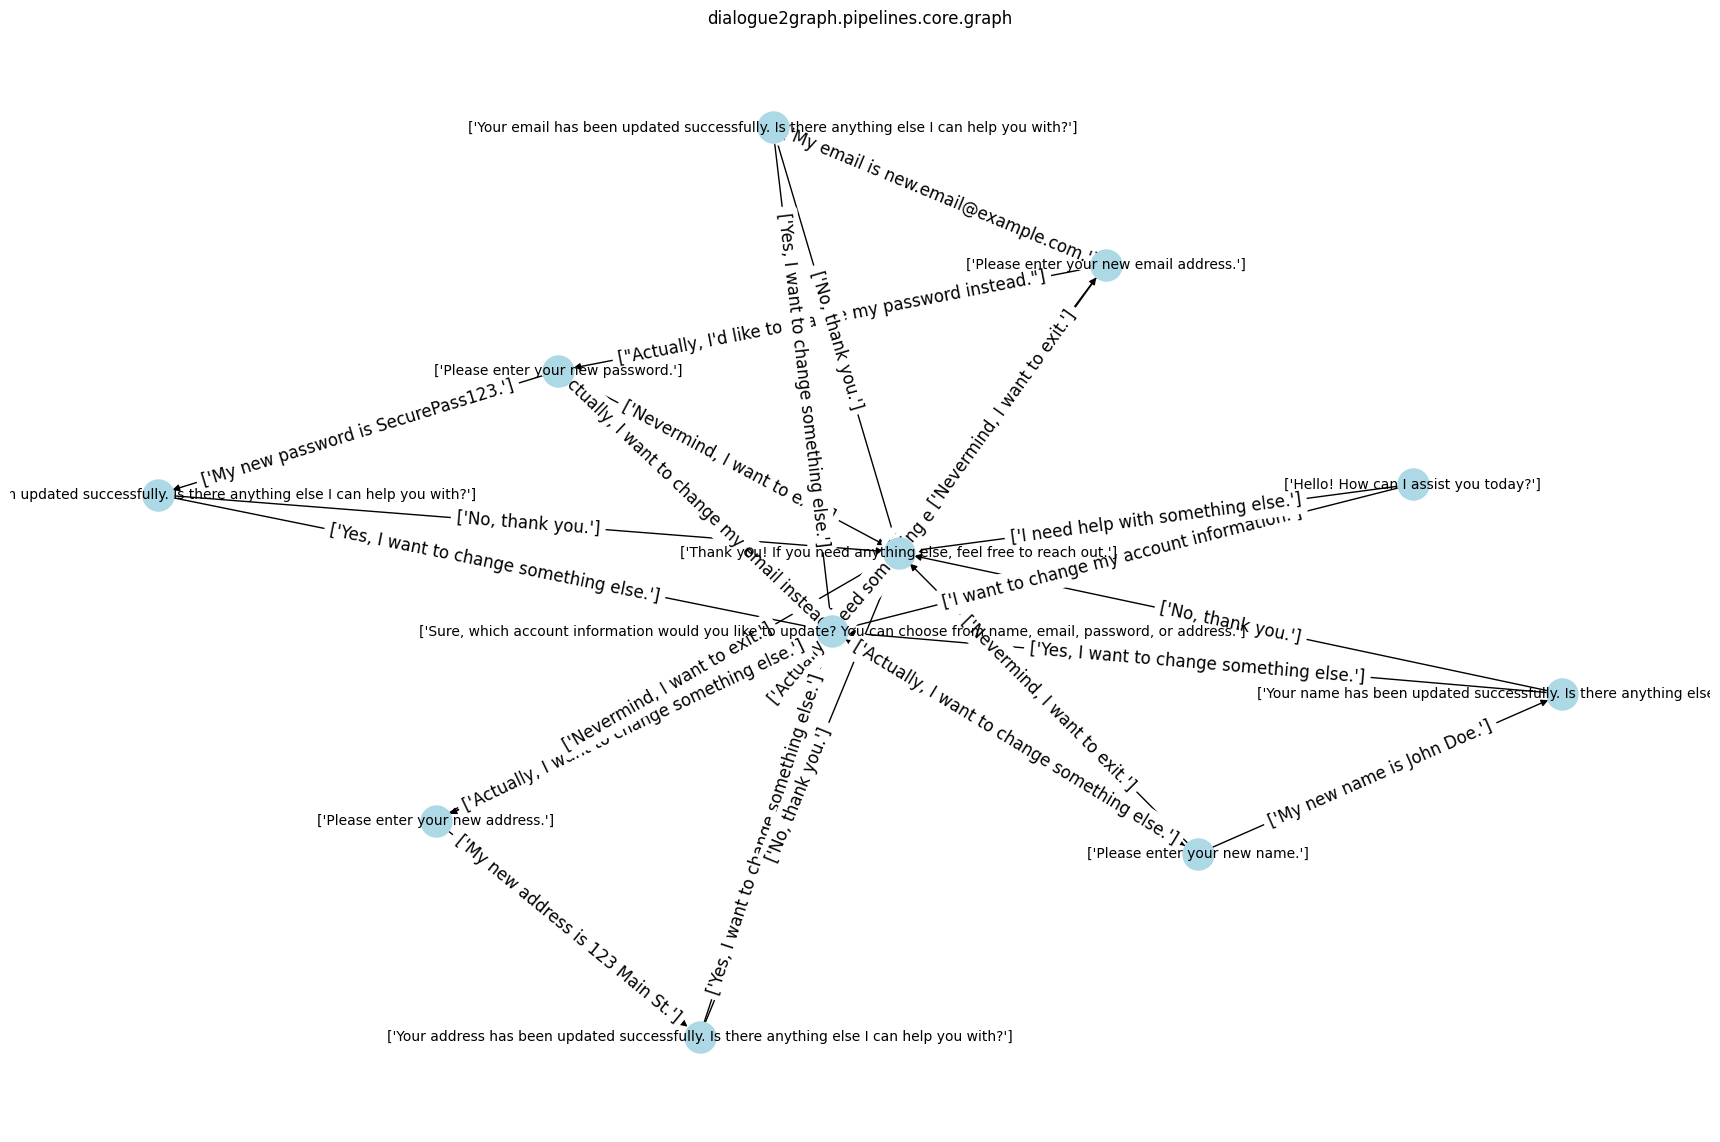

In [9]:
graph = Graph(result[0]['graph'])
graph.visualise()